<ipython-input-2-74ec9d57bba7>:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  player_shooting = nba_shots_data.groupby([player_column, 'SHOT_RANGE'])['SHOT_MADE'].mean() * 100


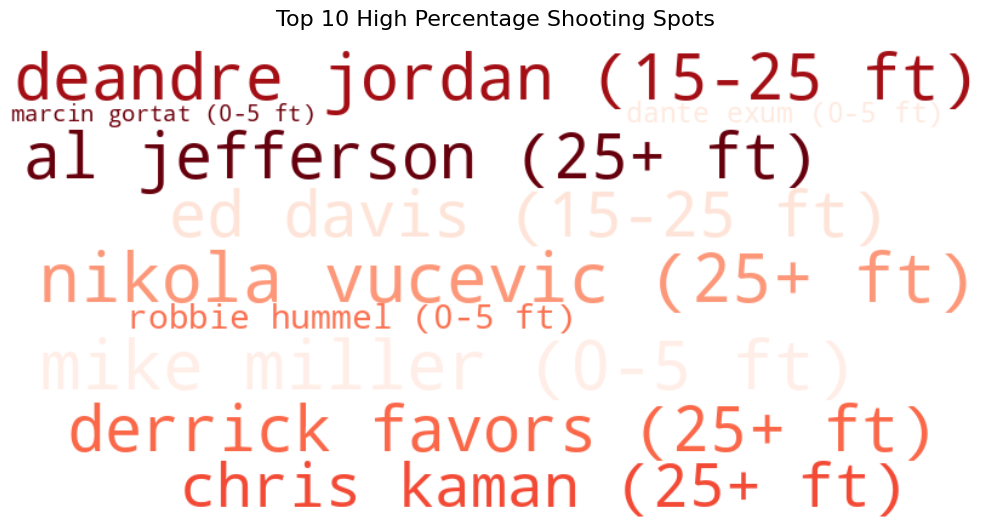

In [ ]:
#David Liv
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load the dataset
nba_shots_data = pd.read_csv('https://github.com/yosephhabtu/MC-CMSC-206-Group-Project/raw/refs/heads/main/shot_logs.csv')

# Add a column to indicate if the shot was made (1 for 'made', 0 for 'missed')
nba_shots_data['SHOT_MADE'] = nba_shots_data['SHOT_RESULT'].apply(lambda x: 1 if x == 'made' else 0)

# Define bins for shot distances
bins = [0, 5, 15, 25, 40]
labels = ['0-5 ft', '5-15 ft', '15-25 ft', '25+ ft']
nba_shots_data['SHOT_RANGE'] = pd.cut(nba_shots_data['SHOT_DIST'], bins=bins, labels=labels)

player_column = 'player_name'

# Group by player and shot range to calculate shooting percentages
player_shooting = nba_shots_data.groupby([player_column, 'SHOT_RANGE'])['SHOT_MADE'].mean() * 100

# Find the range with the highest percentage for each player
high_percentage_spots = player_shooting.groupby(player_column).idxmax()
high_percentage_values = player_shooting.groupby(player_column).max()

# Combine results into a DataFrame
high_percentage_df = pd.DataFrame({
    'High Percentage Spot': [f"{spot[1]}" for spot in high_percentage_spots],
    'Shooting Percentage': high_percentage_values
}).reset_index()

# Select the top 10 players with the highest shooting percentages
top_10_df = high_percentage_df.sort_values(by='Shooting Percentage', ascending=False).head(10)

# Prepare data for the word cloud
wordcloud_data = {
    f"{row[player_column]} ({row['High Percentage Spot']})": row['Shooting Percentage']
    for _, row in top_10_df.iterrows()
}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 10 High Percentage Shooting Spots', fontsize=16)
plt.tight_layout()
plt.show()
